In [1]:
#imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array, array_to_img
import pathlib

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [2]:
class_names = ['NonDemented', 'Demented']
num_classes = len(class_names)
batch_size = 64
input_shape = (208, 176, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

Found 5121 files belonging to 2 classes.
Found 1279 files belonging to 2 classes.


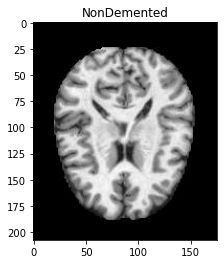

In [3]:
train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')

train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

for images, labels, in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    
train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [5]:
input_t = keras.Input(shape=input_shape)
         
         
ResNet = keras.applications.ResNet101(
        include_top=False,
        input_tensor=input_t,
        pooling=max)

for layers in ResNet.layers[:]:
    layers.trainable = False

model = keras.models.Sequential()
#model.add(keras.layers.BatchNormalization())
model.add(ResNet)
model.summary()
#model.add(keras.layers.Flatten())
#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Dense(128,activation="softmax"))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Dense(512,activation="softmax"))
#model.add(tf.keras.layers.Dropout(0.7))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Dense(256,activation="softmax"))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Dense(64,activation="softmax"))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2,activation="softmax"))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 6, 2048)        42658176  
Total params: 42,658,176
Trainable params: 0
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
epochs = 30
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
 
history = model.fit(train_dataset, epochs=epochs,validation_data=test_dataset)

Epoch 1/30
81/81 [==============================] - 49s 505ms/step - loss: 0.6578 - accuracy: 0.7901 - val_loss: 0.9579 - val_accuracy: 0.7123
Epoch 2/30
80/81 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9658

In [147]:
score = model.evaluate(test_dataset,verbose=0)
print("Test loss:",score[0])
print("Test accuracy", score[1])

Test loss: 2.1780221462249756
Test accuracy 0.5652853846549988


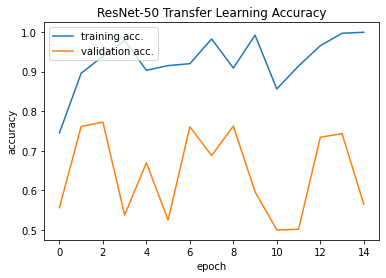

In [149]:
plt.title('ResNet-50 Transfer Learning Accuracy')

plt.plot(history.history['accuracy'], label = "training acc.")
plt.plot(history.history['val_accuracy'], label = "validation acc.")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training acc.', 'validation acc.'], loc='upper left')

#plt.savefig("../Project/Result/RESET2_MODEL_ACCURACY")
plt.show()